### Desafío - Dimensionalidad y Agrupación (II)

<br>
<br>

Nombre: Juan Oyarce G

Profesor: Gabriel Tamayo

Generación: G2


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip



### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre album_covers

* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import warnings
from skimage import io as io
from skimage import data_dir
warnings.filterwarnings('ignore')

### Desafío 2: Importación de imagenes
* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?

* Para visualizar la imágen en el notebook, ocupe io.imshow .

In [2]:
io.imread('cara.jpg') # imread devuelve un arreglo numpy con la información de los colores RGB
image=io.imread('cara.jpg') 

In [3]:
type(image)

numpy.ndarray

In [4]:
image.dtype

dtype('uint8')

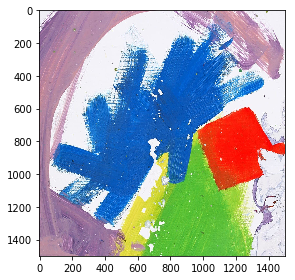

In [5]:
io.imshow('cara.jpg')

- imread devuelve un arreglo numpy con la información de los colores RGB

### Desafío 3: Preprocesamiento de imágenes y KMeans
* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales (RGB) mediante shape .
* Posteriormente redimensionaremos la imágen con reshape. 
    (Tips: reshape(heigth * width , rgb))
    
* Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [6]:
image.shape

(1500, 1500, 3)

In [7]:
cover=image.reshape(1500*1500, 3) # Se transforma de 3 dimensiones a 2 dimensiones

Text(0, 0, '1548460516.940518')

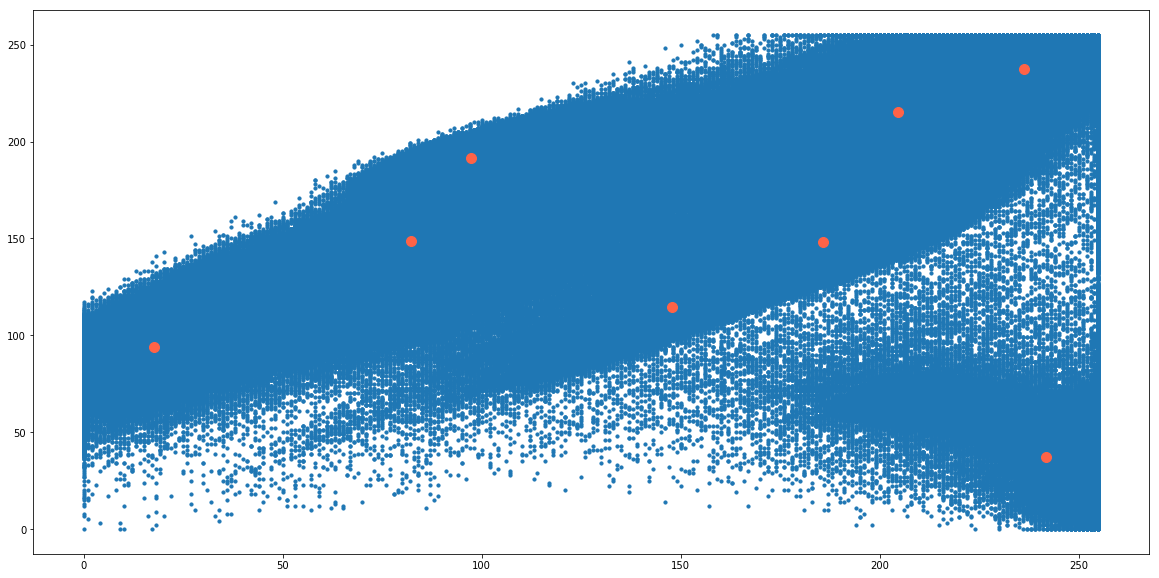

In [8]:
kmean = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=30)
kmean.fit_predict(cover)
centroides_kmean= kmean.cluster_centers_
labels_kmean= kmean.labels_
inertia_kmean = kmean.inertia_
plt.figure(figsize=(20,10))
plt.scatter(cover[:,0], cover[:,1], s =10)
plt.scatter(centroides_kmean[:,0], centroides_kmean[:,1], color='tomato', s=100, marker= 'o')
plt.Text(0,0,str(inertia_kmean))

In [9]:
pd.Series(kmean.labels_).value_counts('%')

2    0.272201
7    0.238104
1    0.148956
4    0.109540
6    0.090740
3    0.066404
5    0.040145
0    0.033909
dtype: float64

- De los 8 cluster propuestos, se puede apreciar que  4 clusters concentran el 77 % de la variabilidad, sin embargo visualmente no se aprecia demasiado bien la división de éstos, debido a que una gran densidad en la concentración de datos.

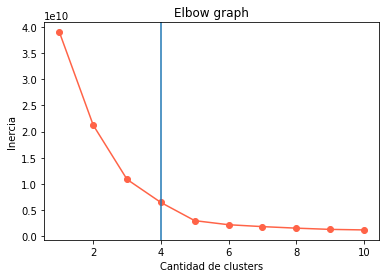

In [10]:
# generamos un array para guardar los resultados.
inertia = []
# Para cada número entre 1 y 10
for i in range(1, 11):
# Agregamos la inercia
    inertia.append(KMeans(n_clusters=i,
    random_state=11238).fit(cover).inertia_)
# graficamos el resultado
plt.plot(range(1, 11), inertia, 'o-', color='tomato')
plt.xlabel("Cantidad de clusters")
plt.ylabel("Inercia")
plt.title("Elbow graph")
plt.axvline(4)

- El gráfico de Inercia muestra que efectivamente con 4 cluster se logra explicar la variabilidad , antes de alcanzar una estabilidad mayor(codo), a partir de los 7 clusters

Text(0, 0, '2509930639.275015')

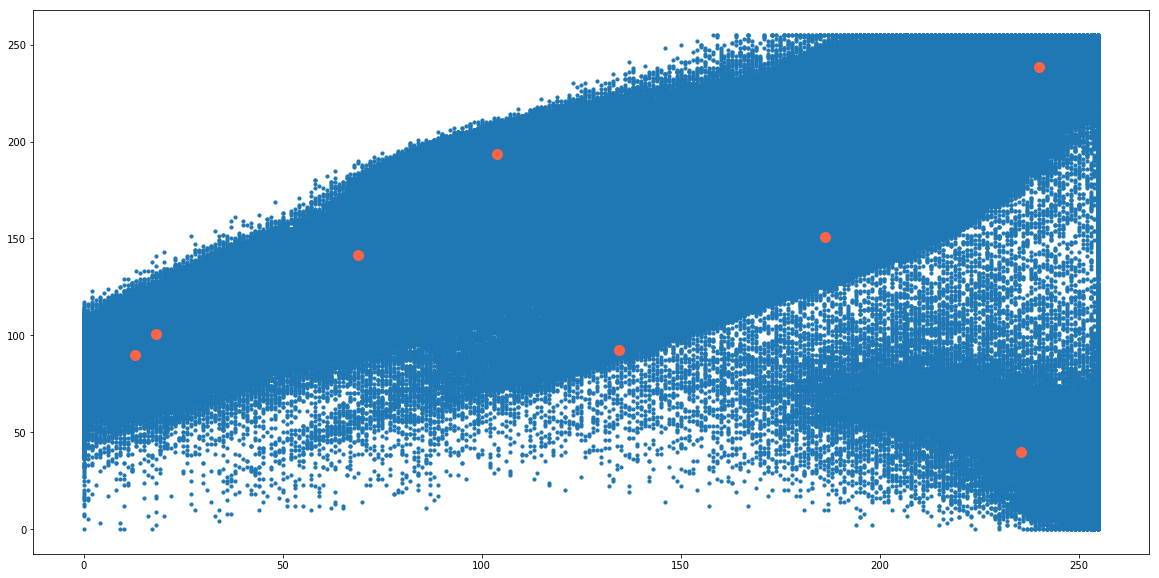

In [11]:
minibatchkmean = MiniBatchKMeans(init='k-means++',n_clusters=8,random_state=11238,batch_size=6,max_iter=30)
minibatchkmean.fit_predict(cover)
centroides_mini= minibatchkmean.cluster_centers_
labels_mini= minibatchkmean.labels_
inertia_mini = minibatchkmean.inertia_
plt.figure(figsize=(20,10))
plt.scatter(cover[:,0], cover[:,1], s =10)
plt.scatter(centroides_mini[:,0], centroides_mini[:,1], color='tomato', s=100, marker= 'o')
plt.Text(0,0,str(inertia_mini))

In [12]:
pd.Series(labels_mini).value_counts('%')

0    0.274113
7    0.198664
5    0.159027
4    0.131826
1    0.075619
3    0.066364
2    0.057576
6    0.036812
dtype: float64

- De los 8 cluster propuestos, se puede apreciar que  4 clusters concentran el 76 % de la variabilidad, sin embargo visualmente no se aprecia demasiado bien la división de éstos, debido a que una gran densidad en la concentración de datos, guardan una similitud con el algoritmo K Means.


- El algoritmo miniBatchKmeans tiene un rendimiento más rápido de ejecución que el algoritmo K-means, sin embargo su performance es un poco más baja que el algoritmo K-Means, ya que asigna valores un poco más bajo a los principales 4 clusters, sin embargo la diferencia para éste caso es muy baja, por lo que también resulta ser un buen algoritmo de agrupamiento.

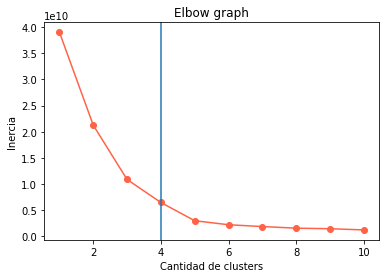

In [13]:
# generamos un array para guardar los resultados.
inertia_mini= []
# Para cada número entre 1 y 10
for i in range(1, 11):
# Agregamos la inercia
    inertia_mini.append(MiniBatchKMeans(n_clusters=i,
    random_state=11238).fit(cover).inertia_)
# graficamos el resultado
plt.plot(range(1, 11), inertia_mini, 'o-', color='tomato')
plt.xlabel("Cantidad de clusters")
plt.ylabel("Inercia")
plt.title("Elbow graph")
plt.axvline(4)

### Desafío 4: Extracción de valores
* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .

In [14]:
labels_kmean

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
centroides_kmean


array([[ 82.13710035, 148.48546261, 208.15696203],
       [185.7686774 , 147.95263926, 172.73331424],
       [236.39728228, 237.53146176, 243.27958153],
       [241.70396027,  37.00580286,  12.80347904],
       [ 97.2048729 , 191.31204025,  55.54583004],
       [204.66478455, 215.15841858,  75.80057349],
       [147.78318595, 114.75076465, 152.64987937],
       [ 17.51338056,  93.99506776, 184.11838118]])

In [16]:
centroides= np.array(centroides_kmean).reshape(8,3)  # convertimos el arreglo o matriz, a un arreglo de np
centroides_kmeans_list=centroides.tolist()          # transformamos el arreglo en lista de tuplas para iterarlo con la fx

In [17]:
centroides_kmeans_list

[[82.13710035246814, 148.48546261255308, 208.15696202534275],
 [185.76867740198017, 147.95263925807228, 172.73331423748945],
 [236.39728228478288, 237.53146175977366, 243.27958153359936],
 [241.7039602699249, 37.00580286312152, 12.803479040709902],
 [97.2048729027467, 191.31204024921166, 55.545830036842816],
 [204.6647845535167, 215.15841858200162, 75.8005734910193],
 [147.78318594897593, 114.75076465328866, 152.64987936833316],
 [17.513380564599373, 93.99506776269197, 184.11838117970595]]

In [18]:
count_cover=np.unique(labels_kmean,return_counts=True) 
count_cover 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 76295, 335152, 612452, 149409, 246466,  90327, 204166, 535733],
       dtype=int64))

### Desafío 5: Conversión rgb a hex

* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [29]:
# función para transformar colores rgb a colores en formato hexadecimal
def rgb_hex_it(rgb):
    """
    Definición: Función que recibe un color en formato rgb y lo transforma en formato hexadecimal
    Input: rgb, string con el color en formato rgb
    Outpout: retorna un arreglo con las 3 posiciones del formato hexadecimal
    """
    tmp = list(map(lambda x: int(x), rgb))
    return'#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])


In [30]:
# ciclo para transformar los colores rgb asociados a los centroides del método K-Means

color_hex_list=[]
for i in centroides_kmeans_list:
    color_hex_list.append(rgb_hex_it(i)) 
    
  
 
 
        


In [21]:
color_hex_list

['#5294d0',
 '#b993ac',
 '#ecedf3',
 '#f1250c',
 '#61bf37',
 '#ccd74b',
 '#937298',
 '#115db8']

### Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [22]:
color_hex_list

['#5294d0',
 '#b993ac',
 '#ecedf3',
 '#f1250c',
 '#61bf37',
 '#ccd74b',
 '#937298',
 '#115db8']

In [23]:
# Ocurrencia del color
frequency=list(count_cover[1])
frequency

[76295, 335152, 612452, 149409, 246466, 90327, 204166, 535733]

In [24]:
# Porcentaje del color respecto a los cluster_centers
porcentaje_list=list(map(lambda x: round(x/sum(frequency), 3),frequency))
porcentaje_list

[0.034, 0.149, 0.272, 0.066, 0.11, 0.04, 0.091, 0.238]

In [31]:
#Generación de un dataframe a partir del diccionario con los valores de porcentaje, frecuencia y lista de color de los centroides
diccionario={'color_hex':color_hex_list, 'color_freq':frequency, 'color_percent':porcentaje_list}
dfc=pd.DataFrame(data=diccionario).sort_values(by='color_percent', ascending=False)

In [26]:
dfc.columns

Index(['color_hex', 'color_freq', 'color_percent'], dtype='object')

In [27]:
dfc.head(8)

,color_hex,color_freq,color_percent
2,#ecedf3,612452,0.272
7,#115db8,535733,0.238
1,#b993ac,335152,0.149
4,#61bf37,246466,0.110
6,#937298,204166,0.091
3,#f1250c,149409,0.066
5,#ccd74b,90327,0.040
0,#5294d0,76295,0.034


### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

<function matplotlib.pyplot.show(*args, **kw)>

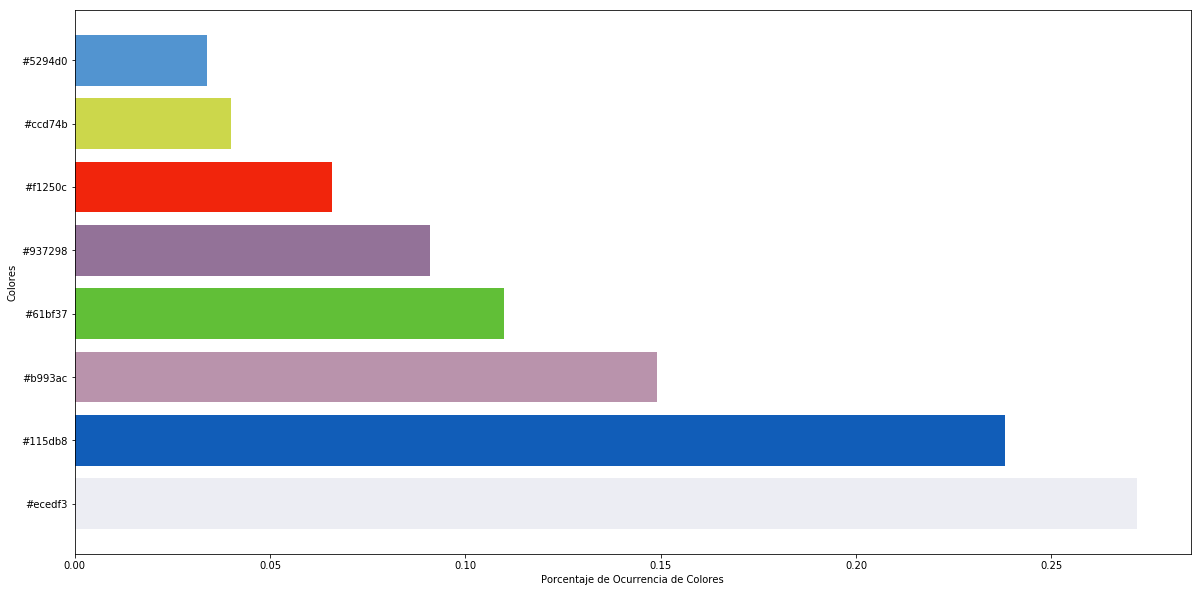

In [28]:
plt.figure(figsize=(20,10))
plt.barh(dfc['color_hex'], dfc['color_percent'], color= dfc['color_hex'])
plt.xlabel('Porcentaje de Ocurrencia de Colores')
plt.ylabel('Colores')
plt.show

- Se puede apreciar que los colores predominantes son el gris, azul, burdeo claro y verde, ésto se corresponde visualmente con la imagen analizada, por lo que el método de agrupamiento K-means logró ser una buena aproximación para separar y agrupar los pixeles de la imagen. 